In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import graphviz
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [10]:
# To use 한글 font in graphs
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

ds_hmeq = pd.read_csv("./csvfiles/HMEQ.csv")

ds_hmeq.isnull().sum()

ds_hmeq["JOB"].fillna("Other", inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(), inplace = True)

ds_hmeq_dummy = pd.get_dummies(ds_hmeq)
ds_hmeq_dummy.head()

np.random.seed(seed = 1234)
msk = np.random.rand(ds_hmeq_dummy.shape[0]) < 0.7
ds_hmeq_train = ds_hmeq_dummy[msk]
ds_hmeq_test = ds_hmeq_dummy[~msk]

ds_hmeq_train_y = ds_hmeq_train["BAD"]
ds_hmeq_train_x = ds_hmeq_train.drop("BAD", axis = 1)
ds_hmeq_test_y = ds_hmeq_test["BAD"]
ds_hmeq_test_x = ds_hmeq_test.drop("BAD", axis = 1)

print("train data X size:", ds_hmeq_train_x.shape)
print("train data y size:", ds_hmeq_train_y.shape)
print("test data X size:", ds_hmeq_test_x.shape)
print("test data y size:", ds_hmeq_test_y.shape)



train data X size: (2604, 18)
train data y size: (2604,)
test data X size: (1144, 18)
test data y size: (1144,)


In [11]:
ds_hmeq_train_x_scaled = scale(ds_hmeq_train_x, axis = 0)
ds_hmeq_test_x_scaled = scale(ds_hmeq_test_x, axis = 0)

In [12]:
# 새로운 scv 모형 생성
svm_uncustomized_scaled = SVC(random_state=1234)
svm_uncustomized_scaled.fit(ds_hmeq_train_x_scaled,ds_hmeq_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set : {:.3f}".format(svm_uncustomized_scaled.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y)))


Accuracy on training set : 0.941


In [13]:
svm_uncustomized_scaled

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
# C 조절하기
#train 및 test정확도 결과 저장용
train_accuracy = []
test_accuracy = []
para_C = []
# C를 0.1부터 1까지 0.1단위로 조정
for i in range(10):
    svm1 = SVC(C=(i+1)/10, random_state=1234)
    svm1.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    para_C.append((i+1)/10)
    train_accuracy.append(svm1.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
    test_accuracy.append(svm1.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
    
#저장된 모델의 criterion 및 train/test 데이터 분류 정확도 테이블 생성

ds_accuracy1 = pd.DataFrame()
ds_accuracy1["C"] = para_C
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1.round(3)


,C,TrainAccuracy,TestAccuracy
0,0.1,0.907,0.910
1,0.2,0.908,0.911
2,0.3,0.921,0.914
3,0.4,0.930,0.920
4,0.5,0.933,0.925
5,0.6,0.936,0.925
6,0.7,0.937,0.927
7,0.8,0.939,0.928
8,0.9,0.940,0.929
9,1.0,0.941,0.934


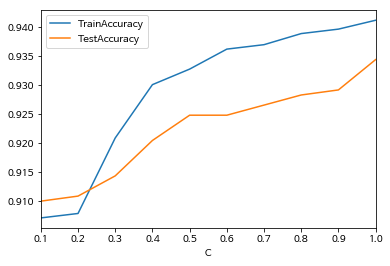

In [29]:
ds_accuracy1.set_index("C").plot.line()

In [26]:
#train 및 test정확도 결과 저장용
train_accuracy = []
test_accuracy = []
para_gamma = []
# C를 0.1부터 1까지 0.1단위로 조정
for i in range(1,10):
    svm2 = SVC(gamma=i/10, random_state=1234)
    svm2.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    para_gamma.append(i/10)
    train_accuracy.append(svm2.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
    test_accuracy.append(svm2.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
    
#저장된 모델의 criterion 및 train/test 데이터 분류 정확도 테이블 생성

ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Gamma"] = para_gamma
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)


,Gamma,TrainAccuracy,TestAccuracy
0,0.1,0.957,0.941
1,0.2,0.970,0.931
2,0.3,0.978,0.922
3,0.4,0.981,0.920
4,0.5,0.985,0.920
5,0.6,0.987,0.920
6,0.7,0.989,0.920
7,0.8,0.991,0.919
8,0.9,0.992,0.919


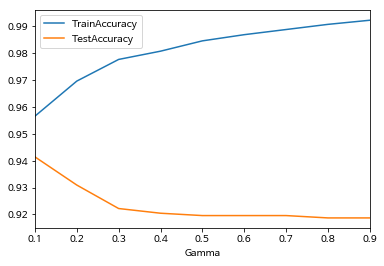

In [27]:
ds_accuracy2.set_index("Gamma").plot.line()